In [ ]:
import cv2 #필요한 라이브러리 
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import skimage
import time
import math
from tqdm.notebook import tqdm
from skimage.morphology import skeletonize
import pandas as pd

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

In [ ]:
import os
import json
from google.colab import drive

drive.mount('/content/gdrive')

In [ ]:
'''
/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/train /train_ref
/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/test1/test
/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/test2_1/test2_1
/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/전처리/train
/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/전처리/test
/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/전처리/test2
'''

'\n/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/train /train_ref\n/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/test1/test\n/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/test2_1/test2_1\n/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/전처리/train\n/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/전처리/test\n/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/전처리/test2\n'

전처리

In [ ]:
train = pd.DataFrame({'path': glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/train /train_ref/*')})
train

In [ ]:
# 이미지 하나씩 꺼내오면서 전처리 
for i in train.index: 
  img = cv2.imread(train["path"][i], 0)
  img_g = cv2.GaussianBlur(img, (3, 3), 0) 
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  img_cl = clahe.apply(img_g)
  img_c = cv2.adaptiveThreshold(img_cl, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2)
  img_c = 255 - img_c 
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
  img_morph = cv2.morphologyEx(img_c, cv2.MORPH_OPEN, kernel, iterations=1)
  img_morph = cv2.morphologyEx(img_c , cv2.MORPH_OPEN, kernel, iterations=1)
  img_sk = np.where(img_morph==255, 1, img_morph) # 1참 / 0거짓
  img_sk = skeletonize(img_sk)
  img_sk = img_sk.astype(np.uint8)
  name = train["path"][i].split('/')[-1]
  cv2.imwrite('/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/전처리/train/'+ name, img_sk)  

In [ ]:
test = pd.DataFrame({'path': glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/test1/test/*')})
test

In [ ]:
for i in test.index: 
  img = cv2.imread(test["path"][i], 0)
  img_g = cv2.GaussianBlur(img, (3, 3), 0) 
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  img_cl = clahe.apply(img_g)
  img_c = cv2.adaptiveThreshold(img_cl, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2)
  img_c = 255 - img_c 
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
  img_morph = cv2.morphologyEx(img_c, cv2.MORPH_OPEN, kernel, iterations=1)
  img_morph = cv2.morphologyEx(img_c , cv2.MORPH_OPEN, kernel, iterations=1)
  img_sk = np.where(img_morph==255, 1, img_morph) # 1참 / 0거짓
  img_sk = skeletonize(img_sk)
  img_sk = img_sk.astype(np.uint8)
  name = test["path"][i].split('/')[-1]
  cv2.imwrite('/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/전처리/test/'+ name, img_sk)

In [ ]:
test2 = pd.DataFrame({'path': glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/test2_1/test2_1/*')})
test2

In [ ]:
for i in test2.index: 
  img = cv2.imread(test2["path"][i], 0)
  img_g = cv2.GaussianBlur(img, (3, 3), 0) 
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  img_cl = clahe.apply(img_g)
  img_c = cv2.adaptiveThreshold(img_cl, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2)
  img_c = 255 - img_c 
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
  img_morph = cv2.morphologyEx(img_c, cv2.MORPH_OPEN, kernel, iterations=1)
  img_morph = cv2.morphologyEx(img_c , cv2.MORPH_OPEN, kernel, iterations=1)
  img_sk = np.where(img_morph==255, 1, img_morph) # 1참 / 0거짓
  img_sk = skeletonize(img_sk)
  img_sk = img_sk.astype(np.uint8)
  name = test2["path"][i].split('/')[-1]
  cv2.imwrite('/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/전처리/test2/'+ name, img_sk) 

In [ ]:
test2 = pd.DataFrame({'path': glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/test2_1/test2_2/test2_2/*')})
test2

In [ ]:
for i in test2.index: 
  img = cv2.imread(test2["path"][i], 0)
  img_g = cv2.GaussianBlur(img, (3, 3), 0) 
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  img_cl = clahe.apply(img_g)
  img_c = cv2.adaptiveThreshold(img_cl, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2)
  img_c = 255 - img_c 
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
  img_morph = cv2.morphologyEx(img_c, cv2.MORPH_OPEN, kernel, iterations=1)
  img_morph = cv2.morphologyEx(img_c , cv2.MORPH_OPEN, kernel, iterations=1)
  img_sk = np.where(img_morph==255, 1, img_morph) # 1참 / 0거짓
  img_sk = skeletonize(img_sk)
  img_sk = img_sk.astype(np.uint8)
  name = test2["path"][i].split('/')[-1]
  cv2.imwrite('/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/전처리/test2/'+ name, img_sk)  

In [ ]:
cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/전처리/test2/3.BMP', 0)
plt.imshow(img_sk, cmap='gray')

이미지 가져오기 

In [ ]:
train = pd.DataFrame({'path': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/전처리/train/*'))})
train

,path
0,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
1,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
2,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
3,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
4,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
...,...
472,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
473,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
474,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
475,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...


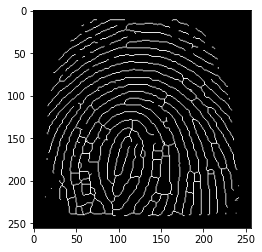

In [ ]:
img = cv2.imread(train['path'][0], 0)
plt.imshow(img, cmap='gray') 

In [ ]:
test = pd.DataFrame({'path': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/전처리/test/*'))})
test

,path
0,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
1,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
2,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
3,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
4,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
...,...
472,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
473,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
474,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
475,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...


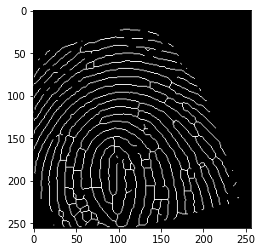

In [ ]:
img = cv2.imread(test['path'][0], 0)
plt.imshow(img, cmap='gray') 

In [ ]:
test2 = pd.DataFrame({'path': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/전처리/test2/*'))})
test2

,path
0,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
1,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
2,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
3,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
4,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
...,...
1423,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
1424,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
1425,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
1426,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...


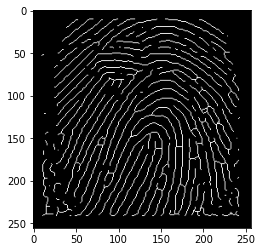

In [ ]:
img = cv2.imread(test2['path'][0], 0)
plt.imshow(img, cmap='gray') 

test1

In [ ]:
def feature(img):
  minutiae = []
  end = 0
  fork = 0
  rows, cols = img.shape[:2]
  
  for i in range(2, rows-2):
    for j in range(2, cols-2):
      result = 0 
      if len(minutiae) == 3:
        break

      for k_i in range(-1, 2):
        for k_j in range(-1, 2):
          result += img[i+k_i, j+k_j]
  
      if result == 2 and end <= 1:
        minutiae.append([i, j, 'e'])
        end += 1
        break
      if result == 4 and fork <= 1:
        minutiae.append([i, j, 'f']) 
        fork += 1
        break
    
  return minutiae

In [ ]:
# train의 피처뽑기 
train_feature = {}
for i in train.index:
  img = cv2.imread(train["path"][i], 0)
  train_feature[train["path"][i].split('/')[-1]] = feature(img)

In [ ]:
# test의 피처뽑기 
test_feature = {}
for i in test.index:
  img = cv2.imread(test["path"][i], 0)
  test_feature[test["path"][i].split('/')[-1]] = feature(img)

In [ ]:
train_feature

{'1.BMP': [[10, 71, 'e'], [11, 70, 'e'], [22, 108, 'f']],
 '10.BMP': [[9, 160, 'e'], [10, 84, 'e'], [15, 80, 'f']],
 '100.BMP': [[9, 66, 'e'], [10, 50, 'e'], [15, 90, 'f']],
 '101.BMP': [[34, 129, 'e'], [35, 107, 'e'], [45, 127, 'f']],
 '102.BMP': [[9, 45, 'e'], [10, 39, 'e'], [21, 36, 'f']],
 '104.BMP': [[10, 70, 'e'], [11, 70, 'e'], [42, 98, 'f']],
 '105.BMP': [[10, 54, 'e'], [11, 40, 'e'], [16, 73, 'f']],
 '106.BMP': [[9, 85, 'e'], [10, 82, 'e'], [15, 116, 'f']],
 '107.BMP': [[10, 91, 'e'], [11, 53, 'e'], [15, 77, 'f']],
 '108.BMP': [[9, 149, 'e'], [10, 108, 'e'], [42, 61, 'f']],
 '11.BMP': [[9, 57, 'e'], [10, 55, 'e'], [12, 81, 'f']],
 '111.BMP': [[9, 104, 'e'], [10, 29, 'e'], [13, 27, 'f']],
 '112.BMP': [[10, 74, 'e'], [11, 73, 'e'], [12, 114, 'f']],
 '113.BMP': [[10, 119, 'e'], [11, 87, 'e'], [20, 79, 'f']],
 '116.BMP': [[10, 73, 'e'], [11, 71, 'e'], [17, 131, 'f']],
 '12.BMP': [[20, 90, 'e'], [21, 92, 'e'], [42, 67, 'f']],
 '120.BMP': [[10, 129, 'e'], [11, 127, 'e'], [31, 131, '

In [ ]:
test_feature

{'1.BMP': [[21, 106, 'e'], [22, 102, 'e'], [44, 131, 'f']],
 '10.BMP': [[28, 118, 'e'], [29, 116, 'e'], [32, 113, 'f']],
 '100.BMP': [[2, 84, 'e'], [3, 81, 'e'], [33, 109, 'f']],
 '101.BMP': [[47, 99, 'e'], [48, 94, 'e'], [62, 91, 'f']],
 '102.BMP': [[6, 112, 'e'], [7, 100, 'e'], [16, 146, 'f']],
 '104.BMP': [[18, 92, 'e'], [19, 87, 'e'], [42, 112, 'f']],
 '105.BMP': [[16, 33, 'e'], [17, 33, 'e'], [23, 65, 'f']],
 '106.BMP': [[32, 113, 'e'], [33, 107, 'e'], [42, 116, 'f']],
 '107.BMP': [[2, 45, 'e'], [3, 44, 'e'], [5, 76, 'f']],
 '108.BMP': [[3, 124, 'e'], [4, 122, 'e'], [21, 87, 'f']],
 '11.BMP': [[2, 15, 'e'], [3, 14, 'e'], [8, 149, 'f']],
 '111.BMP': [[2, 101, 'e'], [3, 97, 'e'], [15, 52, 'f']],
 '112.BMP': [[2, 68, 'e'], [3, 67, 'e'], [4, 163, 'f']],
 '113.BMP': [[11, 117, 'e'], [12, 116, 'e'], [39, 110, 'f']],
 '116.BMP': [[2, 87, 'e'], [3, 85, 'e'], [9, 136, 'f']],
 '12.BMP': [[33, 63, 'e'], [35, 63, 'e'], [57, 41, 'f']],
 '120.BMP': [[3, 146, 'e'], [4, 146, 'e'], [19, 172, 'f']]

In [ ]:
# '1.BMP' affline matrix 구하기 
train_m = train_feature['1.BMP']
train_m = [train_m[0][0:2], train_m[1][0:2], train_m[2][0:2]]
train_m = np.array(train_m, dtype=np.float32)
train_m

array([[ 10.,  71.],
       [ 11.,  70.],
       [ 22., 108.]], dtype=float32)

In [ ]:
test_m = test_feature['1.BMP']
test_m = [test_m[0][0:2], test_m [1][0:2], test_m[2][0:2]]
test_m = np.array(test_m , dtype=np.float32)
test_m 

array([[ 21., 106.],
       [ 22., 102.],
       [ 44., 131.]], dtype=float32)

In [ ]:
mtrx = cv2.getAffineTransform(train_m, test_m)
mtrx

array([[ 1.2244898 ,  0.2244898 , -7.18367347],
       [-2.51020408,  1.48979592, 25.32653061]])

In [ ]:
imgtr = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/전처리/train/1.BMP', 0)
imgte = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/전처리/test/1.BMP', 0)

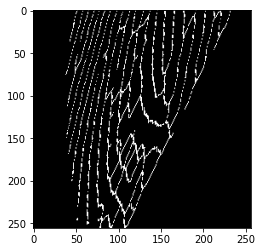

In [ ]:
imgaff = cv2.warpAffine(imgtr, mtrx, (256,256))
# imgaff = 255 - imgaff
plt.imshow(imgaff, cmap='gray')

In [ ]:
tx = mtrx[0][2]
ty = mtrx[1][2]
degree = mtrx[:, 0:2]
print(tx, ty, degree)

-7.183673469387758 25.326530612244902 [[ 1.2244898   0.2244898 ]
 [-2.51020408  1.48979592]]


In [ ]:
#전체 데이터셋에 대해서 
testresult = {}
for k in train_feature:
  # k: *.BMP 
  train_m = train_feature[k]
  test_m = test_feature[k]
  
  # list -> np.float32
  train_m = [train_m[0][0:2], train_m[1][0:2], train_m[2][0:2]]
  train_m = np.array(train_m, dtype=np.float32) 
  test_m = [test_m[0][0:2], test_m [1][0:2], test_m[2][0:2]]
  test_m = np.array(test_m , dtype=np.float32)
  mtrx = cv2.getAffineTransform(train_m, test_m)

  result = []
  tx = mtrx[0][2]
  ty = mtrx[1][2]
  degree = mtrx[:, 0:2]
  result.append(degree)
  result.append(tx)
  result.append(ty)
  testresult[k] = result

In [ ]:
testresult

{'1.BMP': [array([[ 1.2244898 ,  0.2244898 ],
         [-2.51020408,  1.48979592]]), -7.183673469387758, 25.326530612244902],
 '10.BMP': [array([[ 0.59574468, -0.00531915],
         [-0.58510638,  0.01861702]]), 23.48936170212766, 120.28723404255318],
 '100.BMP': [array([[4.33333333, 0.20833333],
         [2.73333333, 0.35833333]]), -50.749999999999986, 35.75000000000002],
 '101.BMP': [array([[ 1.36666667,  0.01666667],
         [-0.69166667,  0.19583333]]), -1.6166666666666654, 97.25416666666665],
 '102.BMP': [array([[ 0.80952381, -0.03174603],
         [ 4.95238095,  2.82539683]]),
  0.1428571428571434,
  -59.714285714285644],
 '104.BMP': [array([[ 1.        , -0.28571429],
         [-5.        ,  6.42857143]]), 27.999999999999815, -307.9999999999962],
 '105.BMP': [array([[1.13592233, 0.00970874],
         [4.34951456, 0.31067961]]), 4.116504854368932, -27.271844660194173],
 '106.BMP': [array([[ 1.24489796,  0.08163265],
         [-3.6122449 ,  0.79591837]]), 13.857142857142854, 77.8

In [ ]:
 for t in testresult['93.BMP'][0]:
  for t2 in t:
    print(t2)

0.49614395886889456
-0.010282776349614395
8.124678663239074
0.16580976863753202


In [ ]:
#텍스트 파일 쓰기 
f = open('/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_test.txt', 'w')
for k in testresult:
  f.write(k+'\n')
  f.write('degree: ')
  for t in testresult[k][0]:
    for t2 in t:
      f.write(str(t2))
  f.write('tx: ')
  f.write(str(testresult[k][1]))
  f.write('ty: ')
  f.write(str(testresult[k][2]))
  f.write('\n\n')
f.close()

test2 

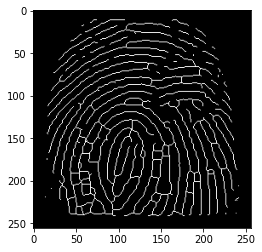

In [ ]:
#1.BMP만 type1,2,3 출력해보기 
img = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/전처리/test2/1_type1.BMP', 0)
plt.imshow(img, cmap='gray')

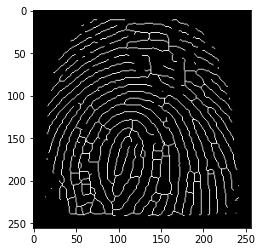

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/전처리/test2/1_type2.BMP', 0)
plt.imshow(img, cmap='gray')

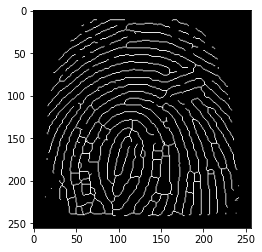

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/생체보/h3_data/전처리/test2/1_type3.BMP', 0)
plt.imshow(img, cmap='gray') 

In [ ]:
#test2 피처 구하기
test2_feature = {}
for i in test2.index:
  img = cv2.imread(test2["path"][i], 0)
  test2_feature[test2["path"][i].split('/')[-1]] = feature(img)

In [ ]:
#전체 데이터셋에 대해서 
%%time 

test2result = {}
for k in train_feature:
  # k: *.BMP 
  train_m = train_feature[k]
  
  # list -> np.float32
  train_m = [train_m[0][0:2], train_m[1][0:2], train_m[2][0:2]]
  train_m = np.array(train_m, dtype=np.float32) 
  if k.split('.')[0]+'_type1.BMP' in test2_feature.keys():
    test2_m1 = test2_feature[k.split('.')[0]+'_type1.BMP']
    test2_m1 = [test2_m1[0][0:2], test2_m1[1][0:2], test2_m1[2][0:2]]
    test2_m1 = np.array(test2_m1, dtype=np.float32)
    mtrx1 = cv2.getAffineTransform(train_m, test2_m1)
    sumtx = mtrx1[0][2]
    sumty =  mtrx1[1][2]

  if k.split('.')[0]+'_type2.BMP' in test2_feature.keys():
    test2_m2 = test2_feature[k.split('.')[0]+'_type2.BMP']
    test2_m2 = [test2_m2[0][0:2], test2_m2[1][0:2], test2_m2[2][0:2]]
    test2_m2 = np.array(test2_m2, dtype=np.float32)
    mtrx2 = cv2.getAffineTransform(train_m, test2_m2)
    sumtx = mtrx2[0][2]
    sumty = mtrx2[1][2]

  if k.split('.')[0]+'_type3.BMP' in test2_feature.keys():
    test2_m3 = test2_feature[k.split('.')[0]+'_type3.BMP']
    test2_m3 = [test2_m3[0][0:2], test2_m3[1][0:2], test2_m3[2][0:2]]
    test2_m3 = np.array(test2_m3, dtype=np.float32)
    mtrx3 = cv2.getAffineTransform(train_m, test2_m3)
    sumtx = mtrx3[1][2]
    sumty =  mtrx3[1][2] 

  
  test2result[k] = sumtx + sumty

CPU times: user 9.74 ms, sys: 0 ns, total: 9.74 ms
Wall time: 9.75 ms


In [ ]:
len(test2result) #전부 들어감 

477

In [ ]:
test2result

{'1.BMP': 0.0,
 '10.BMP': 0.0,
 '100.BMP': 0.0,
 '101.BMP': 0.0,
 '102.BMP': 0.0,
 '104.BMP': 0.0,
 '105.BMP': 0.0,
 '106.BMP': -8.374253671458327e-15,
 '107.BMP': 0.0,
 '108.BMP': 0.0,
 '11.BMP': 0.0,
 '111.BMP': 0.0,
 '112.BMP': 0.0,
 '113.BMP': 0.0,
 '116.BMP': 0.0,
 '12.BMP': -5.21135373660469e-13,
 '120.BMP': 0.0,
 '122.BMP': 0.0,
 '123.BMP': -127.41528239202724,
 '124.BMP': 0.0,
 '125.BMP': 0.0,
 '128.BMP': -0.0,
 '129.BMP': 1.2156164256379796e-13,
 '131.BMP': -5.2224891078368155e-12,
 '132.BMP': 0.0,
 '133.BMP': -0.0,
 '134.BMP': -0.0,
 '137.BMP': -0.0,
 '138.BMP': 0.0,
 '139.BMP': 0.0,
 '14.BMP': 5.350472407832075e-14,
 '143.BMP': 0.0,
 '144.BMP': 0.0,
 '145.BMP': 0.0,
 '146.BMP': -6.494360604847743e-12,
 '147.BMP': -0.0,
 '148.BMP': 0.0,
 '150.BMP': 0.0,
 '151.BMP': 0.0,
 '152.BMP': 0.0,
 '153.BMP': -4.393522582783294e-14,
 '155.BMP': -0.0,
 '157.BMP': 0.0,
 '158.BMP': 0.0,
 '159.BMP': 0.0,
 '16.BMP': 2.997198449024422e-13,
 '160.BMP': 0.0,
 '162.BMP': 2.37321273743876e-12,
 '

In [ ]:
thr= 1 #쓰레드 1

In [ ]:
y_pred = []
y_test2 = [1 for _ in range(477)]
y_test2

In [ ]:
for val in test2result.values():
  if abs(val) <= 1:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
y_pred

In [ ]:
confusion = confusion_matrix(y_test2, y_pred)
acc = accuracy_score(y_test2, y_pred)
confusion

array([[  0,   0],
       [ 10, 467]])

In [ ]:
#FAR = confusion[0][1] / (confusion[0][0] + confusion[0][1]) -> 0?
FRR = confusion[1][0] / (confusion[1][0] + confusion[1][1])
FRR

0.020964360587002098